# Data Analysis on Car accidents

## Downloading the data

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# %cd /content/drive/MyDrive/Kaggle/US_Accidents
# !ls

## Data Preparation and Cleaning


* Loading the csv file
* Exploring the data
* Fix missingg/incorrect/null data
* Starting with preliminary analysis

In [ ]:
import pandas as pd

In [ ]:
data_filepath = "/content/drive/MyDrive/Kaggle/US_Accidents/US_Accidents_Dec20_Updated.csv"

Checking out the data


In [ ]:
df = pd.read_csv(data_filepath)
df.head(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2018-10-17 16:40:36,2018-10-17 17:10:18,35.348240,-80.847221,35.348240,-80.847221,0.000,Three lanes blocked due to accident on I-77 No...,NaN,W W.T. Harris Blvd,R,Charlotte,Mecklenburg,NC,28269,US,US/Eastern,KJQF,2018-10-17 16:58:00,73.4,NaN,33.0,30.17,10.0,NNW,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,NaN,I-70 E,R,Rifle,Garfield,CO,81650,US,US/Mountain,KRIL,2019-12-12 09:46:00,28.0,28.0,88.0,24.67,2.0,NE,3.0,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,NaN,CA-60 W,R,Whittier,Los Angeles,CA,90601,US,US/Pacific,KEMT,2019-12-21 23:53:00,55.0,55.0,40.0,29.86,10.0,E,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
8,A-9,2,2018-05-23 16:50:24,2018-05-23 22:50:24,35.863490,-86.831680,35.849480,-86.832530,0.969,At TN-248/Peytonsville Rd/Exit 61 - Accident. ...,425.0,Old Peytonsville Rd,R,Franklin,Williamson,TN,37064-5029,US,US/Central,KBNA,2018-05-23 16:53:00,87.1,NaN,43.0,30.04,10.0,NE,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,34.420220,-118.581900,0.460,At Magic Mountain

In [ ]:
# Checking the columns in the data
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  47
Number of rows:  2906610


Gathering information about the dataset
* Missing values
* Null values
* Type of data in the file

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


How many columns are numerical data?


In [ ]:
len(df.select_dtypes(['int64', 'float64']).columns)

14

Missing or incorrect values?

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [ ]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

Finding the percantage of missing data per columns?

In [ ]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description         

Plotting the missing percentages

In [ ]:
# Plotting a Pandas.Series data
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)

In [ ]:
type(missing_data) # we can directly plot the Pandas.Series using plot()

pandas.core.series.Series

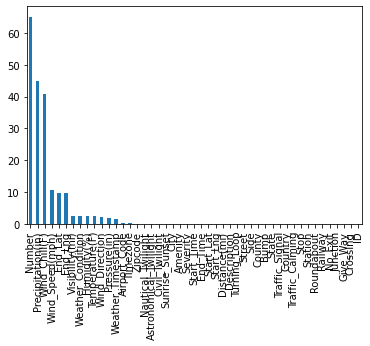

In [ ]:
missing_data.plot(kind='bar')

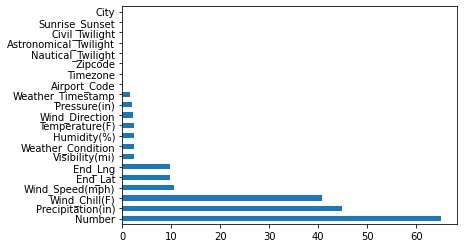

In [ ]:
missing_data[missing_data!=0].plot(kind='barh')

When a value is missing more than 50% of the time its probably better to avoid using it, because it would not make much impact on the overall analysis. 

Here the columns number, precipitation, and wind chill are missing around 40-60% of the time. It would be better not to include it in the analysis

## Exploratory Data Analysis

Analysing some of the columns to gain more insights about the data

Columns we will analyze:
1. City
2. Start time
3. Start Lat
4. Start Long


In [ ]:
# Printing all the columns
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### The `City` column in the dataset

In [ ]:
df.City.unique()

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [ ]:
cities = df.City.unique()
len(cities)

11790

Getting the number of accidents in each city over all years (2016-2020)

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

**Finding :** Being the highes populated city, New york is not in top accidents city.

**Hypothesis:** There could be a relationship between not just the population but also per-capita income and government support on the number of accidents in each city

In [ ]:
'New York' in cities

True

In [ ]:
cities_by_accident["New York"]

7328

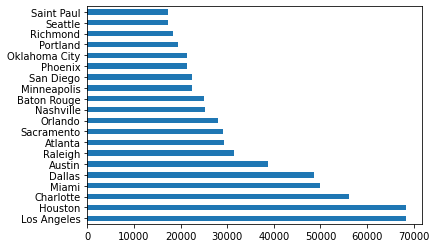

In [ ]:
cities_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

Plotting all the citis by number of accidents accidents

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


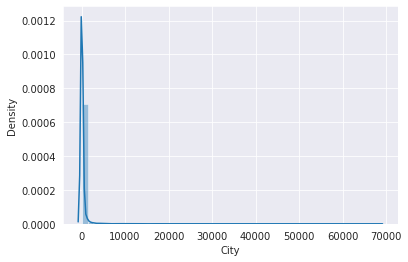

In [ ]:
sns.distplot(cities_by_accident)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000] # having over 1000 accidents
low_accident_cities = cities_by_accident[cities_by_accident < 1000]  # having less than 1000 accidents

In [ ]:
# Percentage of high accident cities
len(high_accident_cities) / len(cities_by_accident)

0.04351514123335313

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


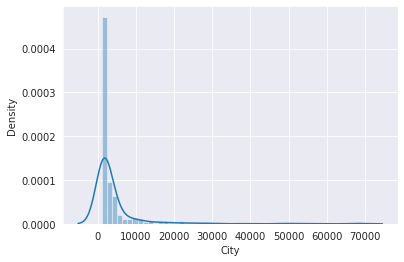

In [ ]:
# Distribution of high accident cities
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


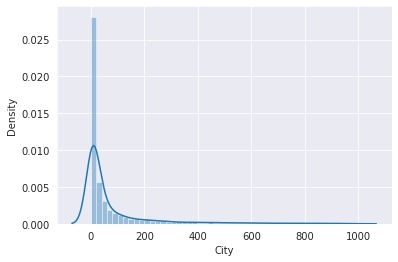

In [ ]:
# Distribution of low accident cities
sns.distplot(low_accident_cities)

We see that in all plots we did of accidents, there is almost an exponential decay. So it must follow some exponential functions. And exponential functions are difficult to plot, so we can plot it on some logarathmic scale

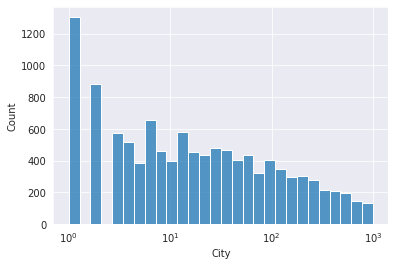

In [ ]:
# Distribution of low accident cities
sns.histplot(low_accident_cities, log_scale=True)

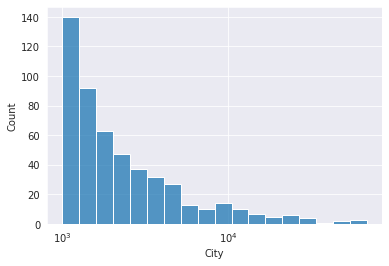

In [ ]:
# Distribution of high accident cities
sns.histplot(high_accident_cities, log_scale=True)

There are alos cities which have reported just 1 accident in 4 years.

This could be an indication of some missing data/ irregularities or the impact of population, per-capitaincome, government spending, average age of city, etc. as hypothesised earlier

In [ ]:
cities_by_accident[cities_by_accident == 1]

Clinchco                    1
Conemaugh                   1
Beardstown                  1
Tompkinsville               1
Fairchild Air Force Base    1
                           ..
Manitowish Waters           1
Polo                        1
East Dorset                 1
Marine City                 1
Wardsboro                   1
Name: City, Length: 1306, dtype: int64

### The `Start_Time` column in the dataset

In [ ]:
#checking out an entry
df.Start_Time[0] 

'2019-05-21 08:29:55'

In [ ]:
# converting date time to correct format
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time[0]

Timestamp('2019-05-21 08:29:55')

In [ ]:
# Segregating the different aspects of date-time
df.Start_Time[0].day, df.Start_Time[0].month, df.Start_Time[0].year, df.Start_Time[0].hour, df.Start_Time[0].minute, df.Start_Time[0].second

(21, 5, 2019, 8, 29, 55)

Get the hour of the day for all the data

In [ ]:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

Plotting the density distribution and count distribution of accidents at each hour of the day

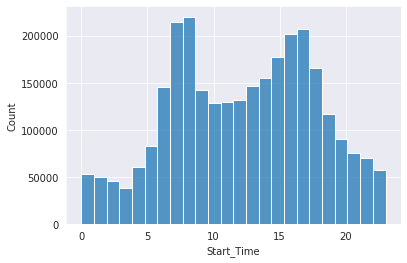

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

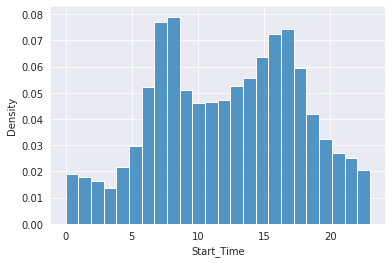

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='density')

**Inferences from the above plots**
 - A high percentage of accidents occur between 7 to 10 am (probably because of people leaving for work and also because of traffic) (a good thing to check is to check t with the traffic chart)
 - Again from 3 to 7 pm, theres a rise in accidents (maybe due to end of office hous and people leaving for home)

Comparing the day of week wrt the accidents

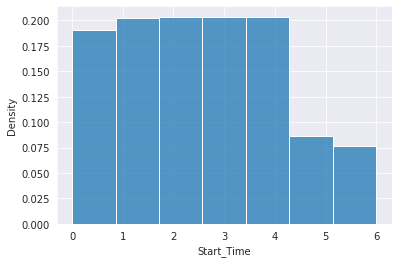

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat='density')

**Inferences from the above plots**

- There are lower number of accidents on weekends [Saturdays and Sundays] (probably beacse less people are commuting for work or other activities)

Checking the patterns of accidents on weekend (per hour), to see if they follow a similar trends as the weekdays

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]

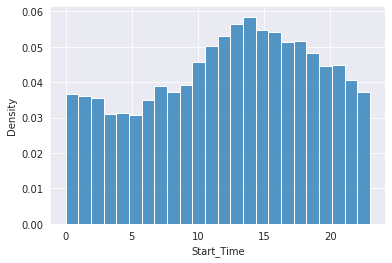

In [ ]:
sns.histplot(sundays_start_time.dt.hour, bins=24, stat='density')

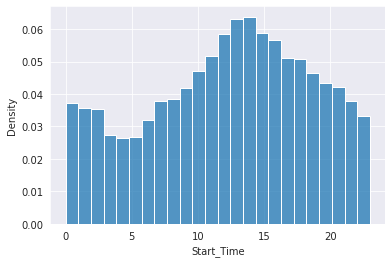

In [ ]:
saturdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, bins=24, stat='density')

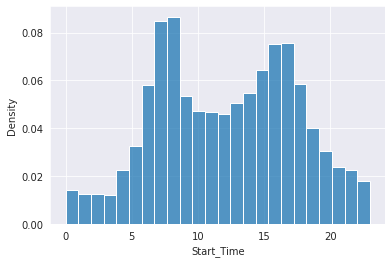

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24, stat='density')

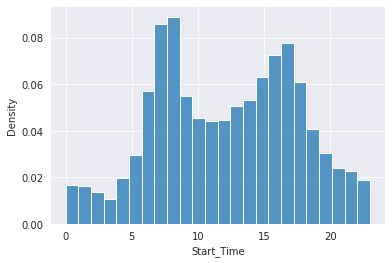

In [ ]:
wednesdays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, bins=24, stat='density')

**Inferences from the above plots**
- On Saturdays and sundays, the peek occurs between 10 am to 3pm whereas on weekdays like mondays the peek is in the morning and afternoon-evening. 
- This could be due to the reason of commuting to work on weekdays(morning and evening hike) and on weekends people might like to go out during the day (the afternoon hike)

Analysis of accidents wrt the months

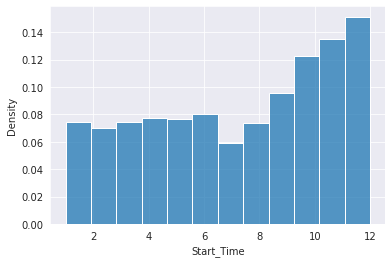

In [ ]:
sns.histplot(df.Start_Time.dt.month, bins=12, stat='density')

**Inquiry:** What could be the explanation for more accidents in the later half of the year?


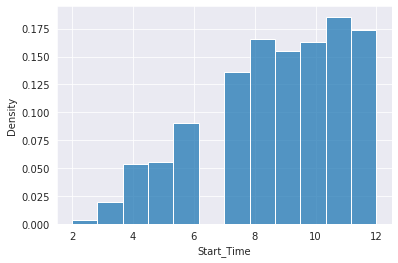

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

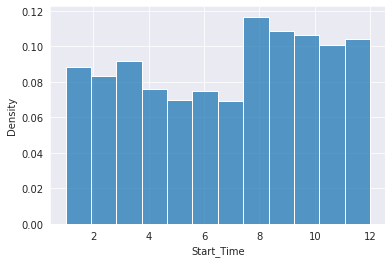

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2017]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

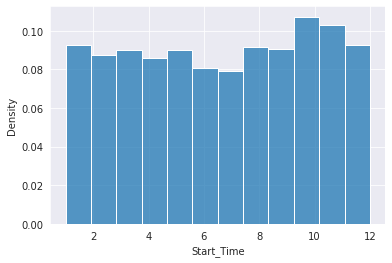

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2018]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

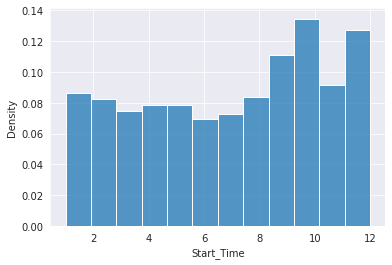

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2019]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

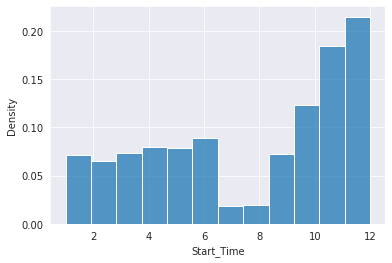

In [ ]:
df_particular_year = df[df.Start_Time.dt.year == 2020]
sns.histplot(df_particular_year.Start_Time.dt.month, bins=12, stat='density')

**Inferences from the above plot**
- A big part of 2016 data and 2020 data seems to be missing or unavailable. Hence the kind of trend seen before of winter months having more accidents could be explained. 
- The missing data of early months of 2016 might be a reason for the plot showing hike in the accidents in winter months

### The `Start_Lat` and `Start_Lng` columns in the Dataset

In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

Plotting the latitudes and longitudes

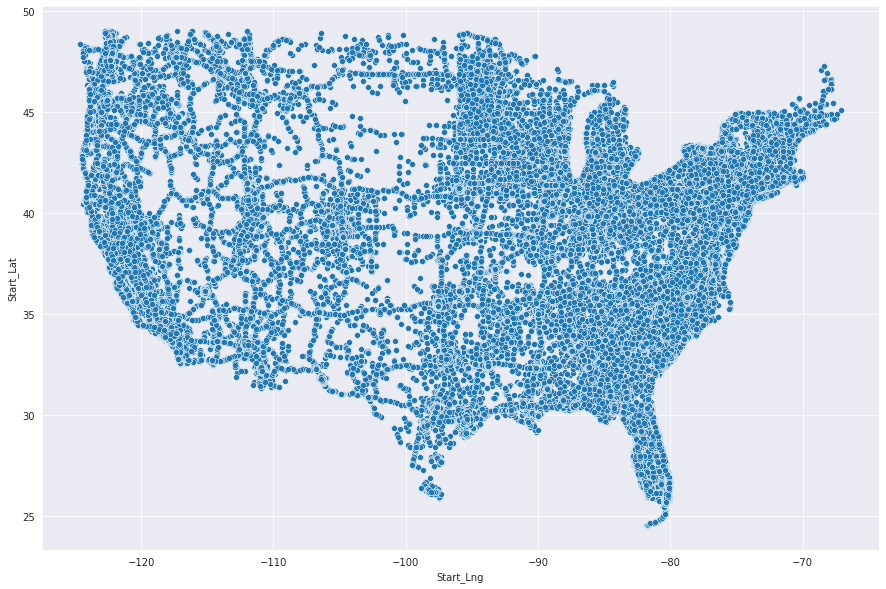

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

### Plotting the accidents density

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


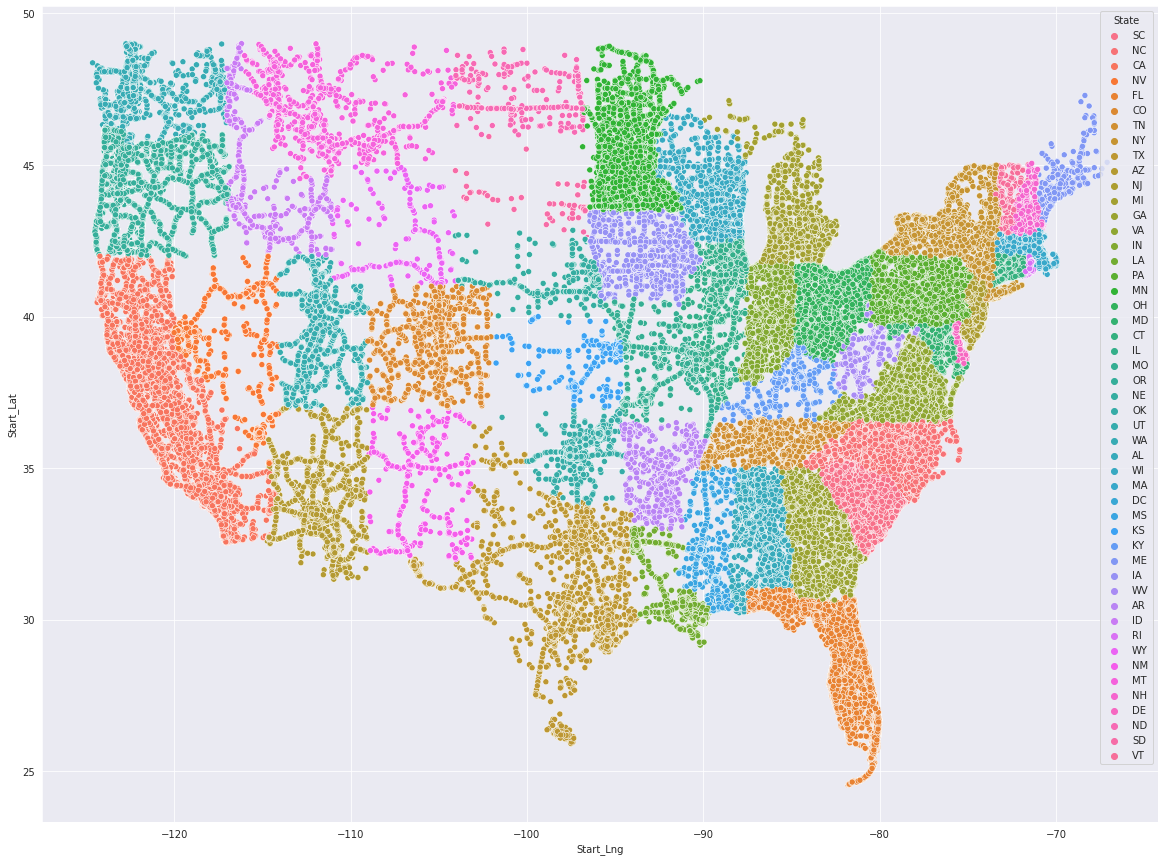

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.State)

### Plotting the accidents as a map

More severe accidents are represented by a darker shade

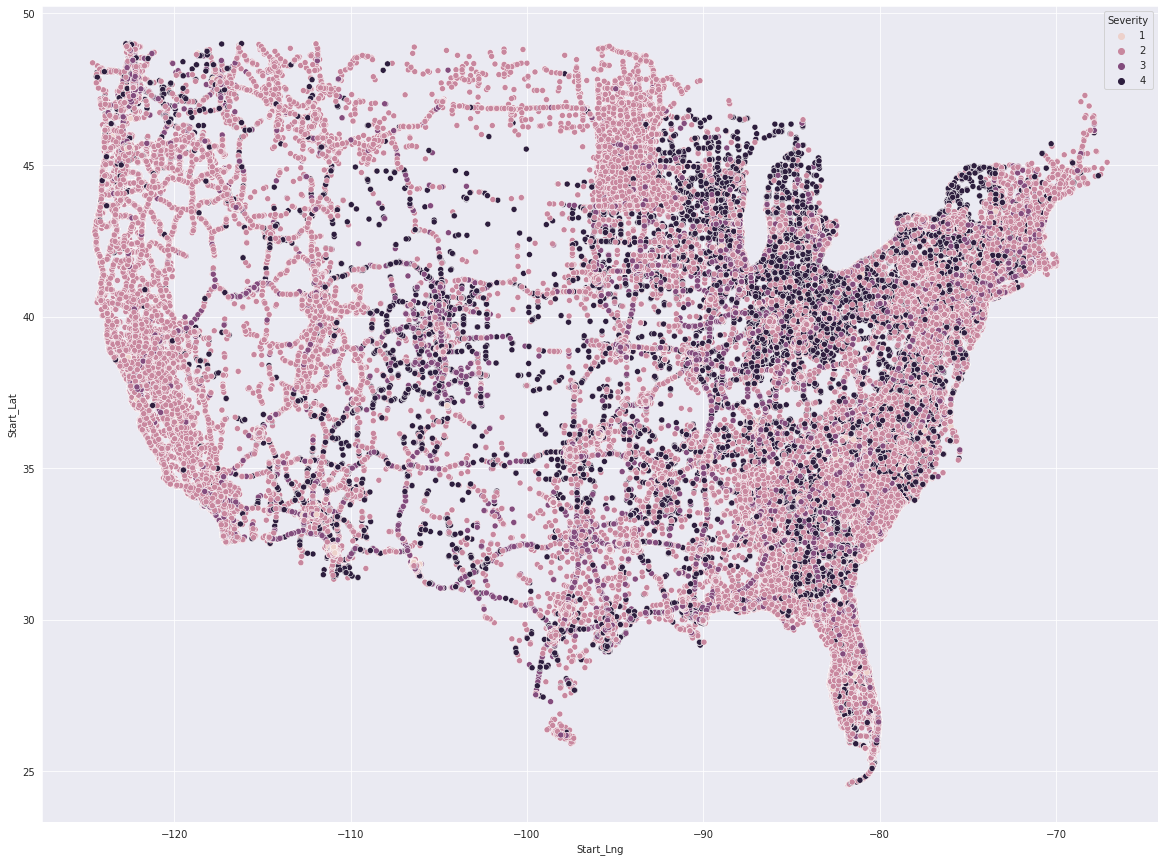

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(y=df.Start_Lat, x=df.Start_Lng, hue=df.Severity)

Getting the number of accidents per state

In [ ]:
df.State.value_counts()[:25]

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
Name: State, dtype: int64

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(34.808868, -82.26915699999998),
 (35.09008, -80.74556),
 (37.14573, -121.985052),
 (39.11039, -119.773781),
 (26.102942, -80.265091),
 (35.34824000000001, -80.84722099999998),
 (39.52397, -107.777),
 (34.034017, -118.026972),
 (35.86349000000001, -86.83168),
 (34.42633, -118.5851),
 (28.021709, -82.203583),
 (40.91221, -73.875099),
 (32.86693, -96.66617),
 (32.265141, -110.90358700000002),
 (41.05982, -74.25092),
 (29.723339000000006, -95.497337),
 (34.103172, -118.249969),
 (34.186595000000004, -117.439427),
 (42.501929, -82.918056),
 (41.556862, -73.779556),
 (33.918056, -84.33802800000002),
 (35.596561, -78.759743),
 (29.640491, -95.482445),
 (37.40691, -79.913933),
 (40.9122, -73.88461),
 (37.994461, -122.069885),
 (32.87109, -80.010628),
 (30.426109000000004, -97.753906),
 (33.774159000000004, -118.049783),
 (43.22039, -85.500961),
 (25.684458, -80.445924),
 (43.003693, -78.412064),
 (39.922646, -86.11689),
 (30.420996, -91.140549),
 (35.23932999999999, -80.856415),
 (35.05473, 

In [ ]:
import random

In [ ]:
df_sample = df.sample(10000)

In [ ]:
df_sample.Start_Lat

668907     41.938133
448021     33.385742
4511       30.272743
1371228    35.863110
2211536    33.553101
             ...    
1029356    38.697596
1149812    42.525455
1018798    43.118233
175231     34.088684
1985548    32.632549
Name: Start_Lat, Length: 10000, dtype: float64

### Checking out some more columns to find anything meaningful

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df['Visibility(mi)']

0          10.0
1          10.0
2          10.0
3          10.0
4          10.0
           ... 
2906605     9.0
2906606    10.0
2906607    10.0
2906608    10.0
2906609    10.0
Name: Visibility(mi), Length: 2906610, dtype: float64

In [ ]:
df['Visibility(mi)'].value_counts()

10.0     2260327
7.0        87566
9.0        75270
8.0        60090
5.0        56646
          ...   
3.2            1
19.0           1
54.0           1
101.0          1
130.0          1
Name: Visibility(mi), Length: 81, dtype: int64

In [ ]:
df[(df.Severity == 4) & (df['Visibility(mi)'] <=10)]  # data when severity is high and visibility is moderate

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
6,A-7,4,2019-12-12 09:48:52,2019-12-12 10:18:05,39.523970,-107.777000,39.565780,-107.516950,14.153,Closed between CO-13/Taughenbaugh Blvd/Exit 90...,NaN,I-70 E,R,Rifle,Garfield,CO,81650,US,US/Mountain,KRIL,2019-12-12 09:46:00,28.0,28.0,88.0,24.67,2.0,NE,3.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
40,A-41,4,2020-10-26 00:38:00,2020-10-26 02:41:25,40.428002,-79.926779,40.426058,-79.895801,1.635,Incident on I-376 EB near I-376 Road closed. T...,NaN,I-376 E,R,Pittsburgh,Allegheny,PA,15217,US,US/Eastern,KAGC,2020-10-26 00:53:00,45.0,43.0,97.0,28.71,10.0,E,5.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
146,A-147,4,2016-08-20 01:31:43,2016-08-20 07:31:43,40.645250,-75.425760,40.630360,-75.471790,2.624,Closed between PA-987/Airport Rd and Fullerton...,NaN,US-22 E,R,Bethlehem,Lehigh,PA,18018,US,US/Eastern,KABE,2016-08-20 01:51:00,69.1,NaN,84.0,29.94,10.0,Calm,NaN,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
167,A-168,4,2019-07-13 16:14:30,2019-07-13 16:42:44,43.849180,-84.020810,43.737277,-84.016961,7.734,Closed between Pinconning Rd/Exit 181 and Linw...,NaN,I-75 S,R,Pinconning,Bay,MI,48650,US,US/Eastern,KIKW,2019-07-13 16:17:00,89.0,89.0,44.0,29.22,10.0,W,12.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
196,A-197,4,2018-07-09 01:08:19,2018-07-09 07:08:19,32.719830,-117.117570,32.716810,-117.119700,0.243,Ramp closed to CA-15 - Road closed due to acci...,NaN,CA-15 S,R,San Diego,San Diego,CA,92105,US,US/Pacific,KSAN,2018-07-09 00:51:00,75.0,NaN,71.0,29.93,10.0,South,4.6,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906549,A-2906550,4,2018-08-26 00:25:54,2018-08-26 02:25:53,25.941730,-80.189260,25.950490,-80.181540,0.772,At I-95 (South) - Accident. Police activity on...,NaN,I-95 N,R,Miami,Miami-Dade,FL,33179,US,US/Eastern,KHWO,2018-08-26 00:53:00,79.0,NaN,82.0,30.15,10.0,ESE,18.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906554,A-2906555,4,2020-04-23 19:18:22,2020-04-23 19:47:31,39.144030,-84.559830,39.137680,-84.548380,0.754,Closed at Beekman St - Road closed due to acci...,NaN,Sutter Ave,R,Cincinnati,Hamilton,OH,45225,US,US/Eastern,KLUK,2020-04-23 18:53:00,56.0,56.0,90.0,29.10,6.0,NE,7.0,0.01,Light Rain,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2906568,A-2906569,4,2019-11-09 03:55:18,2019-11-09 04:22:55,29.182560,-82.184640,29.191010,-82.184590,0.584,Closed at SR-40/Exit 352 - Road closed due to ...,NaN,I-75 N,R,Ocala,Marion,FL,34474,US,US/Eastern,KOCF,2019-11-09 03:51:00,59.0,59.0,100.0,29.95,7.0,VAR,6.0,0.00,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906577,A-2906578,4,2017-03-07 16:01:38,2017-03-07 22:01:38,36.573645,-79.847221,36.559341,-79.826802,1.504,Closed at North Carolina/Virginia - Road close...,3030.0,Morehead Ave,R,Ridgeway,Henry,VA,24148,US,US/Eastern,KMTV,2017-03-07 15:55:00,65.5,NaN,53.0,

In [ ]:
(len(df[df['Visibility(mi)'] <=2]) / len(df) )* 100. # total percentage of accidents in which visibility was less than 2 miles

4.375578422973843

In [ ]:
(len(df[(df['Visibility(mi)'] <=2) & (df['Severity'] ==4)]) / len(df) ) * 100. # total percentage of accidents in which visibility was less than 2 miles and severity was very high

0.21203395020315763

**Inference**
- Low visibility is not the most common reason for accidents

In [ ]:
weather = df.Weather_Condition.value_counts()

In [ ]:
weather[weather > 1000]  # Kind of weather when no. of accidents were greater than 1000

Fair                            692680
Clear                           498925
Mostly Cloudy                   386122
Partly Cloudy                   268851
Cloudy                          245054
Overcast                        237068
Light Rain                      140946
Scattered Clouds                127090
Light Snow                       39941
Fog                              33424
Rain                             33383
Haze                             32993
Heavy Rain                       12340
Light Drizzle                     9484
Fair / Windy                      9121
Smoke                             6037
Mostly Cloudy / Windy             5100
Cloudy / Windy                    4773
Snow                              4589
T-Storm                           3313
Light Thunderstorms and Rain      3089
Partly Cloudy / Windy             3054
Thunder in the Vicinity           2829
Thunderstorm                      2801
Light Rain / Windy                2653
Light Rain with Thunder  

**Inference**
- Generally most accidents are occurring when the weather conditions are fine
- Most accidents are due to man-made reasons
- Snow, Hail, Rain etc are also responsible for inducing accidents, but only a small fraction of the total accident

In [ ]:
import matplotlib.pyplot as plt

Visualizing the distribution of accidents wrt weather conditions 

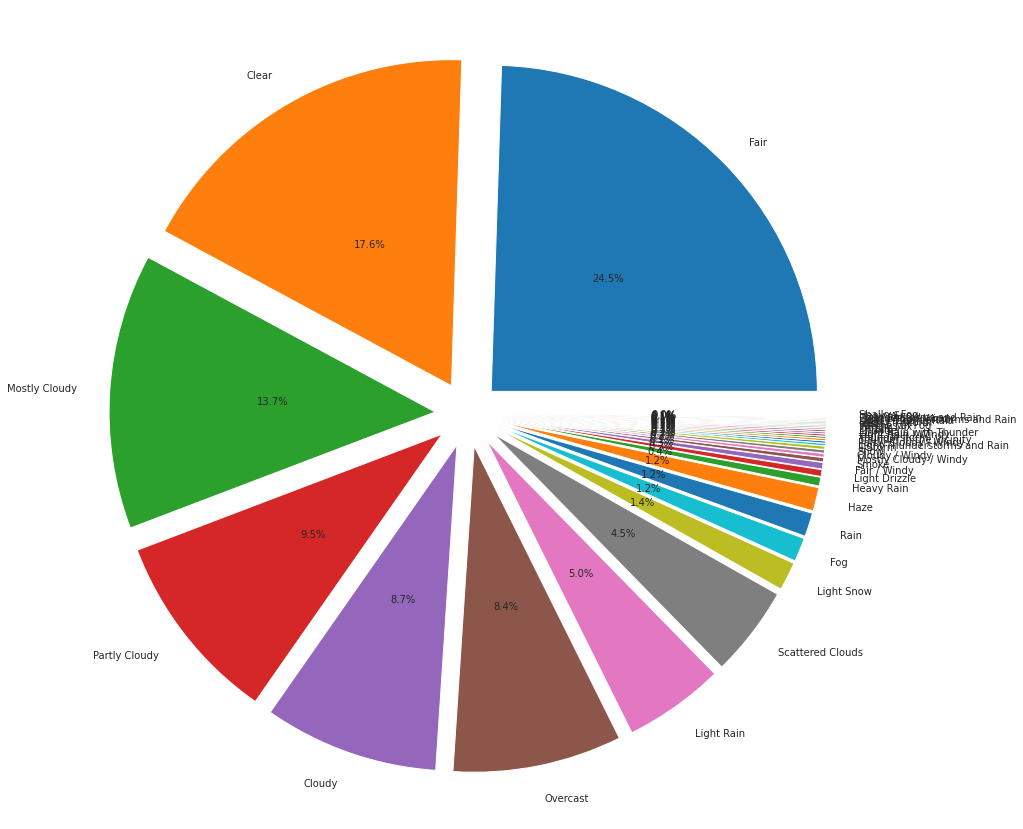

In [ ]:
pie, ax = plt.subplots(figsize=[15,15])
labels = weather[weather > 1000].keys()
plt.pie(x=weather[weather > 1000], autopct="%.1f%%", explode=[0.1]*len(weather[weather > 1000]), labels=labels, pctdistance=0.5)
plt.show();

In [ ]:
df['Temperature(F)']

0          76.0
1          76.0
2          51.0
3          53.6
4          84.2
           ... 
2906605    84.2
2906606    46.9
2906607    76.0
2906608    27.0
2906609    51.1
Name: Temperature(F), Length: 2906610, dtype: float64

In [ ]:
df['Temperature(F)'].value_counts()

 68.0     62008
 59.0     60192
 77.0     59625
 73.0     57029
 63.0     56585
          ...  
 132.6        1
 1.6          1
-19.3         1
-5.4          1
-21.5         1
Name: Temperature(F), Length: 822, dtype: int64

In [ ]:
temperature = df['Temperature(F)'].value_counts()

In [ ]:
temperature.index

Float64Index([ 68.0,  59.0,  77.0,  73.0,  63.0,  64.0,  72.0,  70.0,  61.0,
               75.0,
              ...
              170.6, -12.1, 161.6, 203.0, -15.2, 132.6,   1.6, -19.3,  -5.4,
              -21.5],
             dtype='float64', length=822)

In [ ]:
temperature.values

array([62008, 60192, 59625, 57029, 56585, 55573, 53610, 53400, 53399,
       53394, 53284, 52807, 52794, 49587, 48477, 46922, 44543, 42121,
       39295, 38519, 36097, 35541, 33786, 32382, 32046, 31512, 26320,
       26300, 26291, 26010, 25873, 25714, 25709, 25532, 25471, 25108,
       25064, 24747, 24625, 24278, 24151, 23135, 22800, 21793, 21706,
       21325, 20935, 20869, 20661, 20270, 20094, 20004, 19785, 19661,
       19660, 19570, 19424, 18874, 18686, 18266, 18049, 17393, 16880,
       16052, 15940, 15820, 15213, 14382, 14228, 13897, 13690, 13164,
       12810, 12601, 12519, 12234, 11984, 11655, 11443, 11261, 11085,
       10824, 10676, 10471, 10287,  9912,  9741,  9671,  9557,  9516,
        9458,  9339,  9331,  9252,  9178,  9144,  9062,  9010,  8895,
        8848,  8755,  8504,  8413,  8356,  8302,  8248,  8132,  7652,
        7462,  7089,  6676,  6514,  6487,  5933,  5853,  5769,  5764,
        5515,  5457,  5381,  4860,  4819,  4767,  4755,  4355,  4248,
        4222,  4190,

In [ ]:
import seaborn as sns

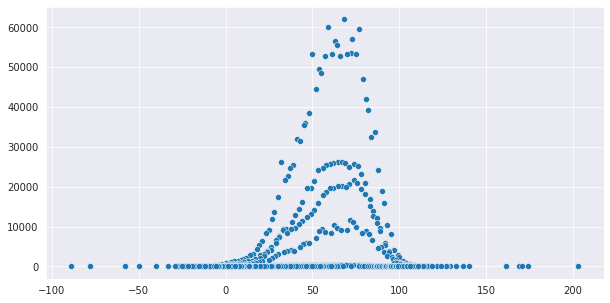

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=temperature.index, y=temperature.values)
plt.show();

**Inference**
- Above plot gives a clear indication that most accidents are occurring in the normal temperature range (60-80 degree F)

Checking out how many accidents are occurring during the day and during the night

In [ ]:
df.Sunrise_Sunset.value_counts()

Day      1941068
Night     965432
Name: Sunrise_Sunset, dtype: int64

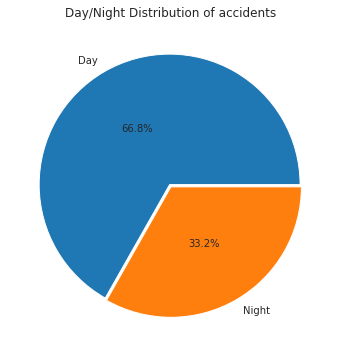

In [ ]:
pie, ax = plt.subplots(figsize=[6,6])
labels = df.Sunrise_Sunset.value_counts().keys()
plt.pie(x=df.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(df.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of accidents")
plt.show();

###Most accidents occur during day-time.